In [157]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'plotly'

In [143]:
df = pd.read_csv("../raw_data/preprocessed_data.csv", index_col=0)

df.head()

,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,portuguese red,red,Douro
US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Rainstorm,pinot gris,white,Willamette Valley
US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,St. Julian,riesling,white,Lake Michigan Shore
US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Sweet Cheeks,pinot noir,red,Willamette Valley
Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tandem,tempranillo-merlot,red,Navarra


In [144]:
X=df.drop(columns=['description','title'])
X.reset_index(inplace=True)

In [145]:
X

,country,points,price,province,winery,variety_adj,type,region
0,Portugal,87,15.0,Douro,Quinta dos Avidagos,portuguese red,red,Douro
1,US,87,14.0,Oregon,Rainstorm,pinot gris,white,Willamette Valley
2,US,87,13.0,Michigan,St. Julian,riesling,white,Lake Michigan Shore
3,US,87,65.0,Oregon,Sweet Cheeks,pinot noir,red,Willamette Valley
4,Spain,87,15.0,Northern Spain,Tandem,tempranillo-merlot,red,Navarra
...,...,...,...,...,...,...,...,...
111529,Germany,90,28.0,Mosel,Dr. H. Thanisch (Erben MÃ¼ller-Burggraef),riesling,white,Mosel
111530,US,90,75.0,Oregon,Citation,pinot noir,red,Oregon
111531,France,90,30.0,Alsace,Domaine Gresser,gewurztraminer,white,Alsace
111532,France,90,32.0,Alsace,Domaine Marcel Deiss,pinot gris,white,Alsace


In [146]:
label_encoder_country = LabelEncoder()
label_encoder_province = LabelEncoder()
label_encoder_winery = LabelEncoder()
label_encoder_variety = LabelEncoder()
label_encoder_region = LabelEncoder()
one_hot_encoder_type = OneHotEncoder(sparse=False)

X['country'] = label_encoder_country.fit_transform(X['country'])
X['province'] = label_encoder_province.fit_transform(X['province'])
X['winery'] = label_encoder_winery.fit_transform(X['winery'])
X['variety_adj'] = label_encoder_variety.fit_transform(X['variety_adj'])
X['region'] = label_encoder_region.fit_transform(X['region'])

type_encoded = one_hot_encoder_type.fit_transform(X[['type']])
type_categories = one_hot_encoder_type.get_feature_names_out(['type'])
type_encoded=pd.DataFrame(type_encoded)
X[type_categories] = type_encoded
X.drop(columns=['type'], inplace=True)
X

/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,country,points,price,province,winery,variety_adj,region,type_red,type_rosé,type_sparkling,type_white
0,30,87,15.0,106,12188,441,486,1.0,0.0,0.0,0.0
1,39,87,14.0,265,12248,427,1554,0.0,0.0,0.0,1.0
2,39,87,13.0,215,13564,470,696,0.0,0.0,0.0,1.0
3,39,87,65.0,265,13788,431,1554,1.0,0.0,0.0,0.0
4,36,87,15.0,259,13868,578,955,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
111529,16,90,28.0,229,6125,470,882,0.0,0.0,0.0,1.0
111530,39,90,75.0,265,4411,431,999,1.0,0.0,0.0,0.0
111531,14,90,30.0,11,5493,205,32,0.0,0.0,0.0,1.0
111532,14,90,32.0,11,5579,427,32,0.0,0.0,0.0,1.0


In [147]:
kmeans = KMeans(n_clusters=500, random_state=0, n_init="auto").fit(X)

In [148]:
# new_X = X.sample(5)


pred = kmeans.predict(X)

In [149]:
pred=pd.DataFrame(pred)
pred.value_counts()

57     625
63     596
134    523
11     496
303    477
      ... 
485     82
127     58
428     32
272     11
365      2
Name: count, Length: 500, dtype: int64

In [150]:
df.iloc[pred[pred[0]==20].index]

,description,points,price,province,title,winery,variety_adj,type,region
country,,,,,,,,,
Mexico,"The color is appropriately light, the aromas a...",88,18.0,Valle de Guadalupe,L.A. Cetto 1996 Private Reserve Nebbiolo (Vall...,L.A. Cetto,nebbiolo,red,Valle de Guadalupe
US,"Despite the abv listed, this wine does not see...",86,36.0,Washington,Kontos 2011 Les Collines Vineyard Syrah (Walla...,Kontos,syrah,red,Walla Walla Valley (WA)
US,"The aromas are light, with notes of white flow...",84,21.0,Washington,Kestrel 2015 Falcon Series Estate Viognier (Ya...,Kestrel,viognier,white,Yakima Valley
Italy,This deeply saturated wine opens with a nice b...,90,32.0,Tuscany,La Calonica 2006 Vino Nobile di Montepulciano,La Calonica,prugnolo gentile,red,Vino Nobile di Montepulciano
US,"This wine is mostly SÃ©millon, with Sauvignon ...",90,20.0,Washington,L'Ecole No. 41 2012 Seven Hills Vineyard Estat...,L'Ecole No. 41,semillon-sauvignon blanc,white,Walla Walla Valley (WA)
...,...,...,...,...,...,...,...,...,...
US,"Coming off the Rocks District, this wine displ...",94,60.0,Washington,K Vintners 2013 Rock Garden Syrah (Walla Walla...,K Vintners,syrah,red,Walla Walla Valley (WA)
US,"The aromas start out reticent, with notes of b...",94,70.0,Washington,K Vintners 2013 Klein Syrah (Walla Walla Valle...,K Vintners,syrah,red,Walla Walla Valley (WA)
Greece,"Clove, menthol, herb and spice give this fresh...",87,22.0,Vin de Pays de Velvendo,Ktima Voyatzi 2010 Dry Red (Vin de Pays de Vel...,Ktima Voyatzi,red blend,red,Vin de Pays de Velvendo


In [167]:
nb_clusters_to_try = np.arange(1,30,1)
wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 2 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 3 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 4 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 5 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 6 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 7 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 8 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 9 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 10 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 11 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 12 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 13 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 14 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 15 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 16 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 17 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 18 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 19 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 20 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 21 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 22 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 23 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 24 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 25 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 26 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 27 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 28 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


working with 29 clusters...


/Users/felipedalcin/.pyenv/versions/3.10.6/envs/WineGen/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DONE !


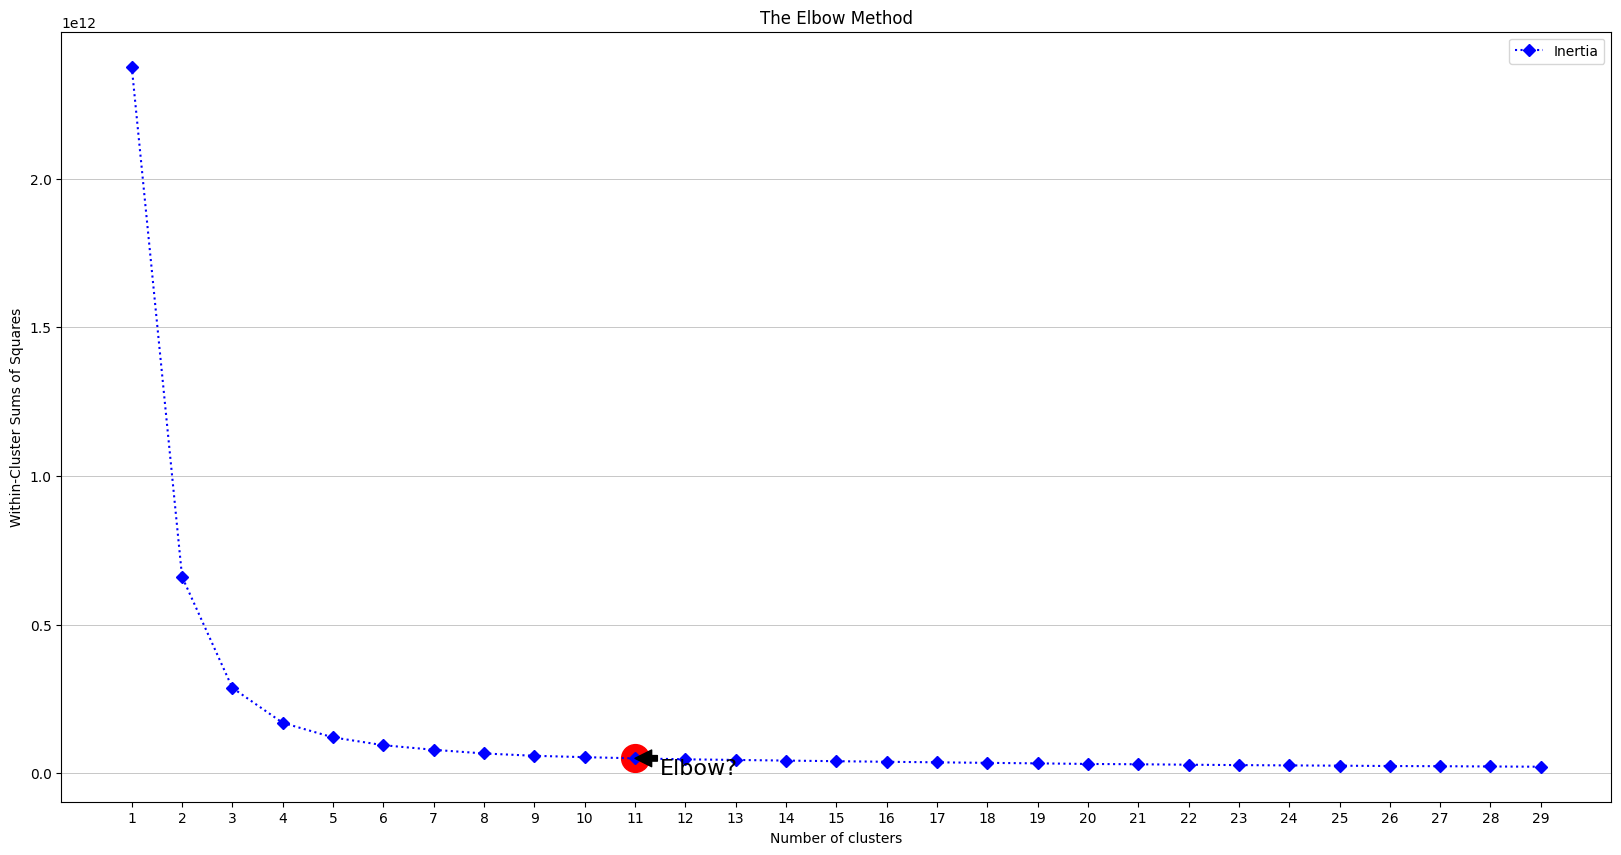

In [168]:
elbow_highlight = 11

with plt.style.context('default'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()